<a href="https://colab.research.google.com/github/Nikhild1093/Nikhild1093/blob/main/Loan_Status_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ninzaami/loan-predication")

print("Path to dataset files:", path)

100%|██████████| 7.83k/7.83k [00:00<00:00, 1.06MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ninzaami/loan-predication/versions/1


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [3]:
data = pd.read_csv('/root/.cache/kagglehub/datasets/ninzaami/loan-predication/versions/1/train_u6lujuX_CVtuZ9i (1).csv')

In [4]:
data.shape

(614, 13)

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Handling missing values

In [9]:
data=data.dropna()

In [10]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [12]:
data.shape

(480, 13)

Check which features are relevant

<Axes: xlabel='Married', ylabel='count'>

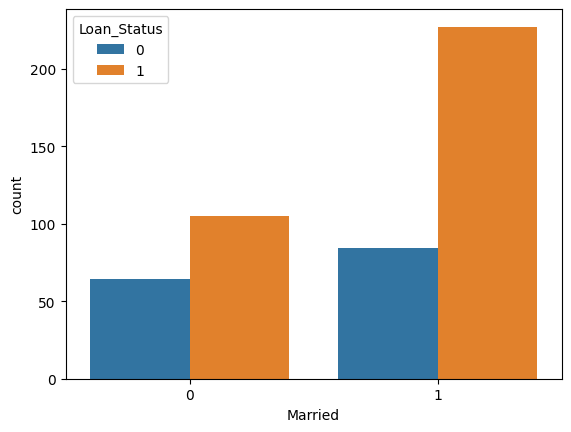

In [27]:
sns.countplot(x='Married', hue = 'Loan_Status', data = data)

<Axes: xlabel='Self_Employed', ylabel='count'>

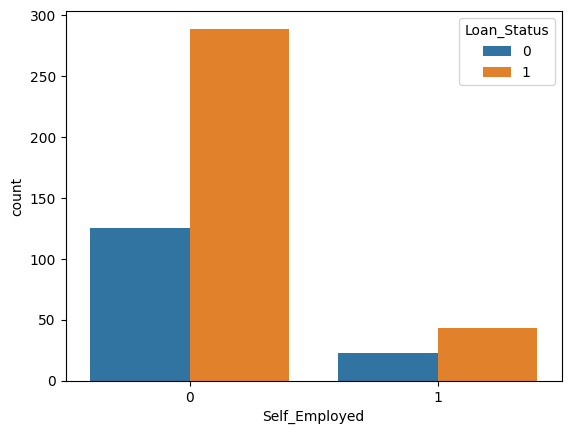

In [28]:
sns.countplot(x='Self_Employed', hue = 'Loan_Status', data = data)

<Axes: xlabel='Gender', ylabel='count'>

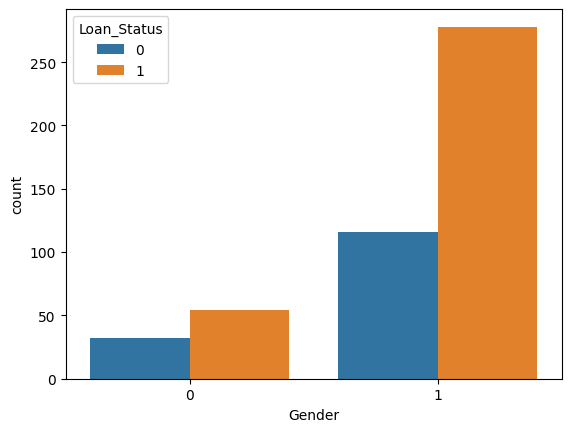

In [29]:
sns.countplot(x='Gender', hue = 'Loan_Status', data = data)

<Axes: xlabel='Education', ylabel='count'>

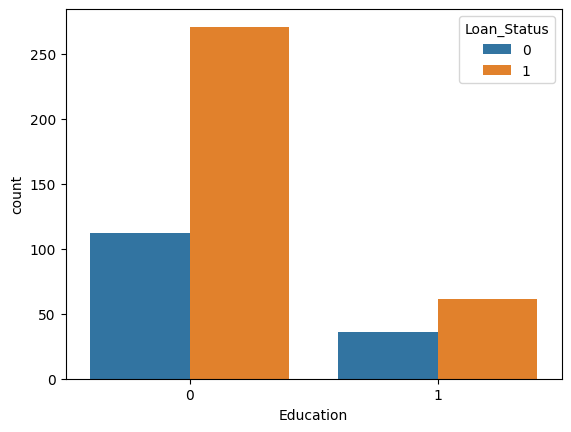

In [30]:
sns.countplot(x='Education', hue = 'Loan_Status', data = data)

<Axes: xlabel='Property_Area', ylabel='count'>

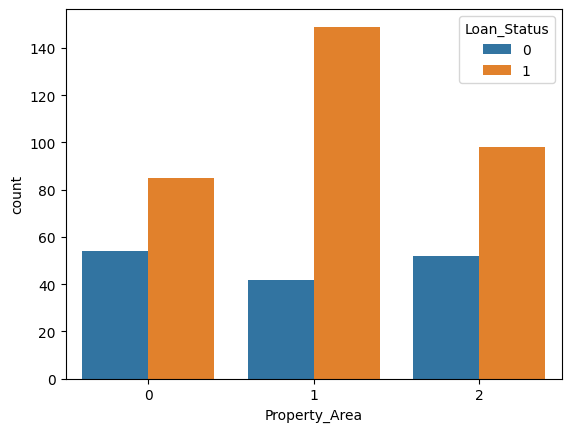

In [31]:
sns.countplot(x='Property_Area', hue = 'Loan_Status', data = data)

<Axes: xlabel='Credit_History', ylabel='count'>

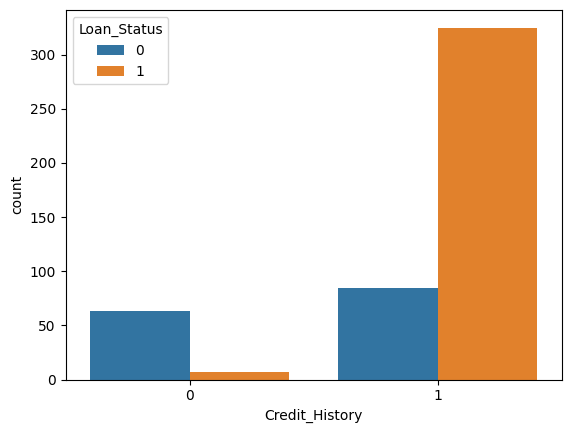

In [32]:
sns.countplot(x='Credit_History', hue = 'Loan_Status', data = data)

<Axes: xlabel='Dependents', ylabel='count'>

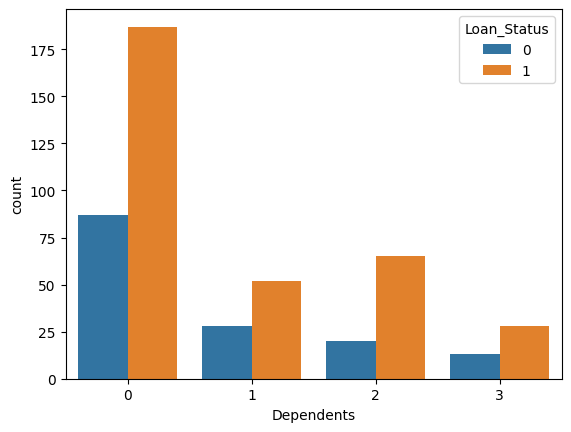

In [33]:
sns.countplot(x='Dependents', hue = 'Loan_Status', data = data)

Label Encoding

In [25]:
LE = LabelEncoder()

columns_to_encode = ['Self_Employed','Gender','Married','Dependents','Education','Property_Area','Credit_History','Loan_Status']

for col in columns_to_encode:
  data[col] = LE.fit_transform(data[col])

In [26]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1,2,1


Feature Selection

In [36]:
X = data.drop(columns=['Loan_Status','Loan_ID'],axis=1)
Y = data['Loan_Status']
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
5         1        1           2          0              1             5417   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

Train Test Split

In [38]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, stratify=Y,random_state=1)

In [39]:
classifier = svm.SVC(kernel='linear')
classifier.fit(Xtrain,Ytrain)

SVC(kernel='linear')

Model Evaluation

In [40]:
#Training data accuracy
xtr_predict = classifier.predict(Xtrain)

Traccuracy = accuracy_score(xtr_predict,Ytrain)
Traccuracy

0.8078703703703703

In [41]:
#Test data accuracy
xtst_predict = classifier.predict(Xtest)

Tstaccuracy = accuracy_score(xtst_predict,Ytest)
Tstaccuracy

0.8333333333333334